In [1]:
import tensorflow as tf

In [4]:
import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

AUTOTUNE = tf.data.AUTOTUNE

In [5]:
dataset, metadata = tfds.load('cycle_gan/horse2zebra',
                              with_info=True, as_supervised=True)

train_horses, train_zebras = dataset['trainA'], dataset['trainB']
test_horses, test_zebras = dataset['testA'], dataset['testB']

2022-04-06 15:45:45.845794: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|                                                                             | 0/111 [00:00<?, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]
Dl Size...:   1%|▌                                                                    | 1/111 [00:01<02:06,  1.15s/ MiB]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   2%|█▏                                                                   | 2/111 [00:01<00:58,  1.86 MiB/s]

Dl Size...:   3%|█▊                                                                   | 3/111 [00:01<00:57,  1.86 MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   4%|██▍                                                                  | 4/111 [00:01<00:25,  4.21 MiB/s]

Dl Size

Dl Size...:  26%|█████████████████▊                                                  | 29/111 [00:02<00:03, 22.44 MiB/s]

Dl Size...:  27%|██████████████████▍                                                 | 30/111 [00:02<00:03, 22.44 MiB/s]

Dl Size...:  28%|██████████████████▉                                                 | 31/111 [00:02<00:03, 22.44 MiB/s]

Extraction completed...: 0 file [00:02, ? file/s]
Dl Size...:  29%|███████████████████▌                                                | 32/111 [00:02<00:03, 22.83 MiB/s]

Dl Size...:  30%|████████████████████▏                                               | 33/111 [00:02<00:03, 22.83 MiB/s]

Dl Size...:  31%|████████████████████▊                                               | 34/111 [00:02<00:03, 22.83 MiB/s]

Extraction completed...: 0 file [00:02, ? file/s]
Dl Size...:  32%|█████████████████████▍                                              | 35/111 [00:02<00:03, 23.56 MiB/s]

Dl Size...:  32%|██████████████████████       

Dl Size...:  54%|████████████████████████████████████▊                               | 60/111 [00:03<00:02, 23.65 MiB/s]

Dl Size...:  55%|█████████████████████████████████████▎                              | 61/111 [00:03<00:02, 23.65 MiB/s]

Extraction completed...: 0 file [00:03, ? file/s]
Dl Size...:  56%|█████████████████████████████████████▉                              | 62/111 [00:03<00:02, 23.34 MiB/s]

Dl Size...:  57%|██████████████████████████████████████▌                             | 63/111 [00:03<00:02, 23.34 MiB/s]

Dl Size...:  58%|███████████████████████████████████████▏                            | 64/111 [00:03<00:02, 23.34 MiB/s]

Extraction completed...: 0 file [00:03, ? file/s]
Dl Size...:  59%|███████████████████████████████████████▊                            | 65/111 [00:03<00:01, 23.21 MiB/s]

Dl Size...:  59%|████████████████████████████████████████▍                           | 66/111 [00:04<00:01, 23.21 MiB/s]

Dl Size...:  60%|█████████████████████████████

Dl Size...:  81%|███████████████████████████████████████████████████████▏            | 90/111 [00:05<00:00, 24.19 MiB/s]

Dl Size...:  82%|███████████████████████████████████████████████████████▋            | 91/111 [00:05<00:00, 24.19 MiB/s]

Extraction completed...: 0 file [00:05, ? file/s]
Dl Size...:  83%|████████████████████████████████████████████████████████▎           | 92/111 [00:05<00:00, 22.22 MiB/s]

Dl Size...:  84%|████████████████████████████████████████████████████████▉           | 93/111 [00:05<00:00, 22.22 MiB/s]

Dl Size...:  85%|█████████████████████████████████████████████████████████▌          | 94/111 [00:05<00:00, 22.22 MiB/s]

Extraction completed...: 0 file [00:05, ? file/s]
Dl Size...:  86%|██████████████████████████████████████████████████████████▏         | 95/111 [00:05<00:00, 22.92 MiB/s]

Dl Size...:  86%|██████████████████████████████████████████████████████████▊         | 96/111 [00:05<00:00, 22.92 MiB/s]

Dl Size...:  87%|█████████████████████████████

Generating trainB examples...:  89%|██████████████████████████████████▌    | 1183/1334 [00:00<00:00, 3761.58 examples/s]
                                                                                                                        
Shuffling /Users/xiaogangyang/tensorflow_datasets/cycle_gan/horse2zebra/2.0.0.incomplete6XK7Z2/cycle_gan-trainB.tfrecord
Shuffling /Users/xiaogangyang/tensorflow_datasets/cycle_gan/horse2zebra/2.0.0.incomplete6XK7Z2/cycle_gan-trainB.tfrecord
Generating testA examples...:   0%|                                                      | 0/120 [00:00<?, ? examples/s]
                                                                                                                        
Shuffling /Users/xiaogangyang/tensorflow_datasets/cycle_gan/horse2zebra/2.0.0.incomplete6XK7Z2/cycle_gan-testA.tfrecord*
                                                                                                                        
Generating testB examples...:   

Dataset cycle_gan downloaded and prepared to /Users/xiaogangyang/tensorflow_datasets/cycle_gan/horse2zebra/2.0.0. Subsequent calls will reuse this data.
Metal device set to: Apple M1 Pro


In [6]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [12]:
def random_crop(image):
    cropped_image = tf.image.random_crop(image, size=[IMG_HEIGHT, IMG_WIDTH, 3])

    return cropped_image

In [17]:
# normalizing the images to [-1, 1]
def normalize(image):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    return image

In [13]:
def random_jitter(image):
  # resizing to 286 x 286 x 3
    image = tf.image.resize(image, [286, 286], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  # randomly cropping to 256 x 256 x 3
    image = random_crop(image)

  # random mirroring
    image = tf.image.random_flip_left_right(image)

    return image

In [14]:
def preprocess_image_train(image, label):
    image = random_jitter(image)
    image = normalize(image)
    return image

In [15]:
def preprocess_image_test(image, label):
    image = normalize(image)
    return image

In [18]:
train_horses = train_horses.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

train_zebras = train_zebras.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

test_horses = test_horses.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

test_zebras = test_zebras.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

In [19]:
sample_horse = next(iter(train_horses))
sample_zebra = next(iter(train_zebras))

2022-04-06 15:50:13.558222: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-06 15:50:14.081147: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-04-06 15:50:14.082255: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-04-06 15:50:14.459763: W t

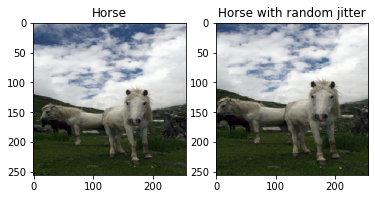

In [20]:
plt.subplot(121)
plt.title('Horse')
plt.imshow(sample_horse[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Horse with random jitter')
plt.imshow(random_jitter(sample_horse[0]) * 0.5 + 0.5)

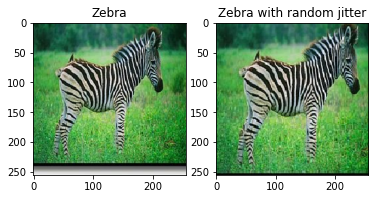

In [21]:
plt.subplot(121)
plt.title('Zebra')
plt.imshow(sample_zebra[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Zebra with random jitter')
plt.imshow(random_jitter(sample_zebra[0]) * 0.5 + 0.5)

In [22]:
OUTPUT_CHANNELS = 3

generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

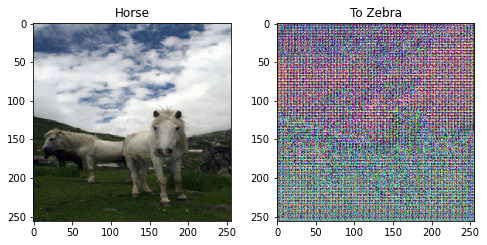

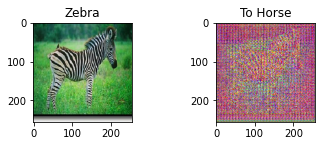

In [25]:
to_zebra = generator_g(sample_horse)
to_horse = generator_f(sample_zebra)
plt.figure(figsize=(8, 8))
contrast = 8

imgs = [sample_horse, to_zebra, sample_zebra, to_horse]
title = ['Horse', 'To Zebra', 'Zebra', 'To Horse']

for i in range(len(imgs)):
    plt.subplot(2, 2, i+1)
    plt.title(title[i])
    if i % 2 == 0:
        plt.imshow(imgs[i][0] * 0.5 + 0.5)
    else:
        plt.imshow(imgs[i][0] * 0.5 * contrast + 0.5)
        plt.show()

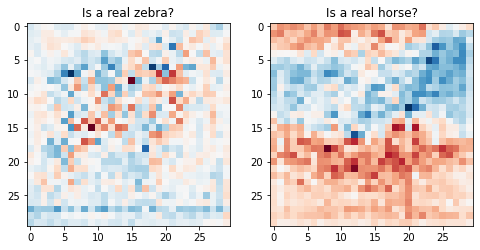

In [26]:
plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.title('Is a real zebra?')
plt.imshow(discriminator_y(sample_zebra)[0, ..., -1], cmap='RdBu_r')

plt.subplot(122)
plt.title('Is a real horse?')
plt.imshow(discriminator_x(sample_horse)[0, ..., -1], cmap='RdBu_r')

plt.show()

In [27]:
LAMBDA = 10
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(real, generated):
    real_loss = loss_obj(tf.ones_like(real), real)

    generated_loss = loss_obj(tf.zeros_like(generated), generated)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss * 0.5
def generator_loss(generated):
    return loss_obj(tf.ones_like(generated), generated)

In [28]:
def calc_cycle_loss(real_image, cycled_image):
    loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

    return LAMBDA * loss1

In [36]:
def identity_loss(real_image, same_image):
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return LAMBDA * 0.5 * loss

In [29]:
generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [30]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

In [34]:
EPOCHS = 40

In [31]:
def generate_images(model, test_input):
    prediction = model(test_input)

    plt.figure(figsize=(12, 12))

    display_list = [test_input[0], prediction[0]]
    title = ['Input Image', 'Predicted Image']
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
        plt.show()

In [40]:
@tf.function
def train_step(real_x, real_y):
  # persistent is set to True because the tape is used more than
  # once to calculate the gradients.
    with tf.GradientTape(persistent=True) as tape:
       
    # Generator G translates X -> Y
    # Generator F translates Y -> X.
        fake_y = generator_g(real_x, training=True)
        cycled_x = generator_f(fake_y, training=True)

        fake_x = generator_f(real_y, training=True)
        cycled_y = generator_g(fake_x, training=True)

    # same_x and same_y are used for identity loss.
        same_x = generator_f(real_x, training=True)
        same_y = generator_g(real_y, training=True)

        disc_real_x = discriminator_x(real_x, training=True)
        disc_real_y = discriminator_y(real_y, training=True)

        disc_fake_x = discriminator_x(fake_x, training=True)
        disc_fake_y = discriminator_y(fake_y, training=True)

    # calculate the loss
        gen_g_loss = generator_loss(disc_fake_y)
        gen_f_loss = generator_loss(disc_fake_x)

        total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)

    # Total generator loss = adversarial loss + cycle loss
        total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
        total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

        disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
        disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)

  # Calculate the gradients for generator and discriminator
    generator_g_gradients = tape.gradient(total_gen_g_loss, 
                                        generator_g.trainable_variables)
    generator_f_gradients = tape.gradient(total_gen_f_loss, 
                                        generator_f.trainable_variables)

    discriminator_x_gradients = tape.gradient(disc_x_loss, 
                                            discriminator_x.trainable_variables)
    discriminator_y_gradients = tape.gradient(disc_y_loss, 
                                            discriminator_y.trainable_variables)

  # Apply the gradients to the optimizer
    generator_g_optimizer.apply_gradients(zip(generator_g_gradients, 
                                            generator_g.trainable_variables))

    generator_f_optimizer.apply_gradients(zip(generator_f_gradients, 
                                            generator_f.trainable_variables))

    discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients,
                                                discriminator_x.trainable_variables))

    discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients,
                                                discriminator_y.trainable_variables))

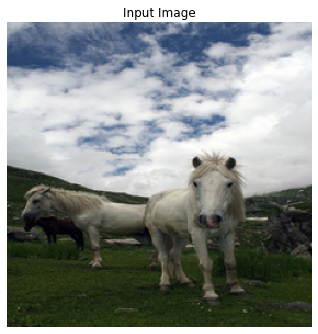

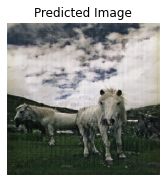

Time taken for epoch 2 is 411.61871910095215 sec

.................

KeyboardInterrupt: 

In [41]:
for epoch in range(EPOCHS):
    start = time.time()

    n = 0
    for image_x, image_y in tf.data.Dataset.zip((train_horses, train_zebras)):
        train_step(image_x, image_y)
        if n % 10 == 0:
            print ('.', end='')
        n += 1
    clear_output(wait=True)
  # Using a consistent image (sample_horse) so that the progress of the model
  # is clearly visible.
    generate_images(generator_g, sample_horse)

    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))

    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1, time.time()-start))